# **Carlos Gross-Martinez**

#**Assignmnet 1 - Ridge Regression**

#**CAP6640 - Computational Foundations of AI**

***Importing libraries to use in the program and importing the information from the excel sheet to create a data frame for data manipulation and processing. Then printing the dataframe to verify information.***

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

data_import = pd.read_csv("Credit_N400_p9.csv")
data_import

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,903
2,104.593,7075,514,4,71,11,Male,No,No,580
3,148.924,9504,681,3,36,11,Female,No,No,964
4,55.882,4897,357,2,68,16,Male,No,Yes,331
...,...,...,...,...,...,...,...,...,...,...
395,12.096,4100,307,3,32,13,Male,No,Yes,560
396,13.364,3838,296,5,65,17,Male,No,No,480
397,57.872,4171,321,5,67,12,Female,No,Yes,138
398,37.728,2525,192,1,44,13,Male,No,Yes,0


***Changing the qualitative features into quantitative by replacing them with “0s” and “1s” in the data frame. Then, printing the results to confirm the changes.***

In [2]:
updated_data_import = data_import.replace({'Gender':{'Male': 1, 'Female': 0}, 'Student':{'Yes': 1, 'No': 0}, 'Married':{'Yes': 1, 'No': 0}}) 
updated_data_import

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Balance
0,14.891,3606,283,2,34,11,1,0,1,333
1,106.025,6645,483,3,82,15,0,1,1,903
2,104.593,7075,514,4,71,11,1,0,0,580
3,148.924,9504,681,3,36,11,0,0,0,964
4,55.882,4897,357,2,68,16,1,0,1,331
...,...,...,...,...,...,...,...,...,...,...
395,12.096,4100,307,3,32,13,1,0,1,560
396,13.364,3838,296,5,65,17,1,0,0,480
397,57.872,4171,321,5,67,12,0,0,1,138
398,37.728,2525,192,1,44,13,1,0,1,0


***Converting data frame into NumPy array. Then printing NumPy array information into screen.***

In [3]:
#convert pandas dataframe into  numpy array
data_in_array = updated_data_import.to_numpy()
print(data_in_array.shape)
data_in_array

(400, 10)


array([[1.48910e+01, 3.60600e+03, 2.83000e+02, ..., 0.00000e+00,
        1.00000e+00, 3.33000e+02],
       [1.06025e+02, 6.64500e+03, 4.83000e+02, ..., 1.00000e+00,
        1.00000e+00, 9.03000e+02],
       [1.04593e+02, 7.07500e+03, 5.14000e+02, ..., 0.00000e+00,
        0.00000e+00, 5.80000e+02],
       ...,
       [5.78720e+01, 4.17100e+03, 3.21000e+02, ..., 0.00000e+00,
        1.00000e+00, 1.38000e+02],
       [3.77280e+01, 2.52500e+03, 1.92000e+02, ..., 0.00000e+00,
        1.00000e+00, 0.00000e+00],
       [1.87010e+01, 5.52400e+03, 4.15000e+02, ..., 0.00000e+00,
        0.00000e+00, 9.66000e+02]])

***Splitting the NumPy array into two arrays. One for features and one for the output from the dataset as well as printing the information about new arrays.***

In [4]:
features = data_in_array[:, 0:9]
true_output = data_in_array[:, -1]

print(features.shape)
#print(features)
print(true_output.shape)
#print(true_output)

(400, 9)
(400,)


***Calculating the mean for all samples in the features as well as the output and saving them into variables for future reference and calculation. Additionally, calculating the standard deviations for all features and saving the results as well. The results are printed with values saved into variables.***

In [5]:
feature_std = []
feature_mean = []
true_output_mean = []

for feature in range(features.shape[1]):
  
  feature_mean.append(np.mean(features[:, feature]))
  feature_std.append(np.std(features[:, feature]))

true_output_mean.append(np.mean(true_output))

print(feature_std)
print(feature_mean)
print(true_output_mean)

[35.20019025455367, 2305.311793445737, 154.53061638393862, 1.36955969201784, 17.228231010466512, 3.1212978070027217, 0.4996936561534477, 0.3, 0.4871793817476269]
[45.218885, 4735.6, 354.94, 2.9575, 55.6675, 13.45, 0.4825, 0.1, 0.6125]
[520.015]


***Centering the values for all the features in the dataset as well as the output by subtracting the mean for each feature. Afterwards, manipulating the results to maintain the same matrix architecture. Finally, printing results to screen to confirm results.***

In [6]:
#Centering features and output
centered_output = []
centered_features = []

centered_output = np.subtract(true_output, true_output_mean)

for feature in range(features.shape[1]):
  centered_features.append(np.subtract(features[:, feature], feature_mean[feature])) 

centered_features = np.array(centered_features)
centered_features = np.transpose(centered_features)
centered_output = np.transpose(centered_output)

print(type(centered_output))
print(centered_output.shape)
#print(centered_output)
print(type(centered_features))
print(centered_features.shape)
#print(centered_features)

<class 'numpy.ndarray'>
(400,)
<class 'numpy.ndarray'>
(400, 9)


***Normalizing the features of the dataset by diving by the standard deviation of the features after they have been centered.***

In [7]:
normalized_features = []

for feature in range(features.shape[1]):
  normalized_features.append(np.divide(centered_features[:, feature], feature_std[feature]))

normalized_features = np.transpose(normalized_features)

print(type(normalized_features))
print(normalized_features.shape)
print(normalized_features)

<class 'numpy.ndarray'>
(400, 9)
[[-0.86158299 -0.48999879 -0.46553881 ...  1.03563452 -0.33333333
   0.79539491]
 [ 1.72743711  0.82826106  0.82870309 ... -0.96559161  3.
   0.79539491]
 [ 1.68675551  1.01478681  1.02931059 ...  1.03563452 -0.33333333
  -1.25723711]
 ...
 [ 0.35946155 -0.24491264 -0.21963285 ... -0.96559161 -0.33333333
   0.79539491]
 [-0.21280808 -0.95891584 -1.05441888 ...  1.03563452 -0.33333333
   0.79539491]
 [-0.75334493  0.34199278  0.38866085 ... -0.96559161 -0.33333333
  -1.25723711]]


***Crating X and y matrices for ridge regression training and printing the information to the screen.***

In [8]:
X = normalized_features
y = centered_output

print(type(y))
print(y.shape)
#print(y)

print(type(X))
print(X.shape)
#print(X)

<class 'numpy.ndarray'>
(400,)
<class 'numpy.ndarray'>
(400, 9)


***Conducting ridge regression with gradient descent using different tunning parameters in order to understand how the tunning parameters affect the result of the Beta values that determines the predictability of future samples. Finally, the results are printed for analysis.***

In [9]:
p = 9
beta = []

alpha = 10**-5
lambdas = [0.01, 0.1, 1, 10, 100, 1000, 10000]

for lamb in lambdas:

  beta_temp = np.random.uniform(-1, 1 ,p)

  for x in range(0, 10**5):
    
    beta_temp = beta_temp - 2 * alpha * (lamb * beta_temp - np.matmul(X.T, (y - np.matmul(X, beta_temp))))
    #print(beta_temp)

  beta.append(beta_temp)
  #print(beta_temp)

beta = np.array(beta)

print(beta.shape)
print(beta)

(7, 9)
[[-2.74653443e+02  4.19624687e+02  1.95868467e+02  2.34473100e+01
  -1.09649998e+01 -3.34718800e+00  5.20097361e+00  1.27783438e+02
  -3.59522041e+00]
 [-2.74345388e+02  4.12467918e+02  2.02726492e+02  2.31572503e+01
  -1.09959624e+01 -3.30614560e+00  5.19136680e+00  1.27703522e+02
  -3.64774851e+00]
 [-2.71234674e+02  3.67999499e+02  2.44137355e+02  2.14261127e+01
  -1.12724304e+01 -3.03731512e+00  5.09421811e+00  1.27069101e+02
  -3.98602020e+00]
 [-2.42108334e+02  3.02250287e+02  2.80525289e+02  2.02747969e+01
  -1.33212924e+01 -2.36122776e+00  4.18577233e+00  1.23168277e+02
  -4.71110792e+00]
 [-9.46394267e+01  2.11365448e+02  2.09546148e+02  2.23649618e+01
  -1.91756880e+01 -4.61880796e-01 -2.19413575e-01  9.76670287e+01
  -5.73202868e+00]
 [ 2.29331014e+01  8.40777050e+01  8.42170361e+01  1.02656498e+01
  -5.69317240e+00 -9.97187472e-02 -1.99329983e+00  3.40023752e+01
  -1.95907508e+00]
 [ 7.30675542e+00  1.44416972e+01  1.44740176e+01  1.50156964e+00
  -1.27982621e-01 -1.

# ***Deliverable 1***

***Plotting the results of the different beta values for each feature in the dataset against the tunning parameters. From the graph it can be observed that as the tuning parameters increase in value, the Beta values of the model approach “0”. Hence, the smaller the value of the tunning parameter, the less restricted the values of the Betas and the higher the value of the tunning parameter, the more restricted the values of the Betas.***

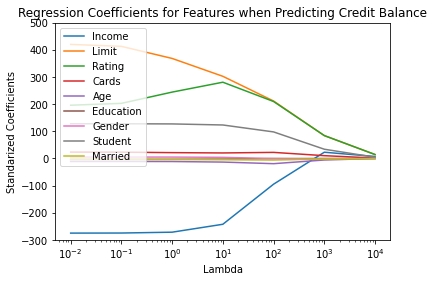

In [10]:
x = np.array(lambdas)

fig, ax = plt.subplots()
plt.xscale('log')
ax.plot(x, beta[:, 0], label="Income")
ax.plot(x, beta[:, 1], label="Limit")
ax.plot(x, beta[:, 2], label="Rating")
ax.plot(x, beta[:, 3], label="Cards")
ax.plot(x, beta[:, 4], label="Age")
ax.plot(x, beta[:, 5], label="Education")
ax.plot(x, beta[:, 6], label="Gender")
ax.plot(x, beta[:, 7], label="Student")
ax.plot(x, beta[:, 8], label="Married")
ax.legend(loc = 'upper left')
plt.ylim(-300, 500)
plt.title("Regression Coefficients for Features when Predicting Credit Balance") 
plt.xlabel("Lambda") 
plt.ylabel("Standarized Coefficients") 
plt.show()

***Defining a function that will split a dataset into 5 folds. The fold split will depend in the variable “fold_number” which will decide which rows are used for the training and test set. The function takes the dataset as well as a fold number which will split the data set and return a training set and a test set.***

In [ ]:
#function that separates dataset into folds
def fold_data_set(dataset, fold_number):
 
  partition = len(dataset) / 5

  if fold_number == 1:

    begin_index = int(partition * 0)
    end_index = int((partition * 1) - 1)
    
    test_set = dataset[begin_index:end_index]
    training_set = np.delete(dataset, slice(begin_index, end_index), axis=0)

    return test_set, training_set
  
  if fold_number == 2:

    begin_index = int(partition * 1)
    end_index = int((partition * 2) - 1)

    test_set = dataset[begin_index:end_index]
    training_set = np.delete(dataset, slice(begin_index, end_index), axis=0)

    return test_set, training_set

  if fold_number == 3:

    begin_index = int(partition * 2)
    end_index = int((partition * 3) - 1)

    test_set = dataset[begin_index:end_index]
    training_set = np.delete(dataset, slice(begin_index, end_index), axis=0)

    return test_set, training_set

  if fold_number == 4:

    begin_index = int(partition * 3)
    end_index = int((partition * 4) - 1)

    test_set = dataset[begin_index:end_index]
    training_set = np.delete(dataset, slice(begin_index, end_index), axis=0)

    return test_set, training_set

  if fold_number == 5:

    begin_index = int(partition * 4)
    end_index = int((partition * 5) - 1)

    test_set = dataset[begin_index:end_index]
    training_set = np.delete(dataset, slice(begin_index,end_index), axis=0)

    return test_set, training_set

***Defining a function that will take the test set and dataset and split it into a training and test feature dataset and a training and test output dataset. The it will conduct data preprocessing such as mean calculation, standard deviation calculations, centering of features and outputs, and normalization of features. The function will return 4 matrices. A training matrix with features and the output, and a test matrix with features and the output for validation.***

In [12]:
def fold_cent_norm(test_set, training_set):

  test_std_temp = []
  test_mean_temp = []
  training_std_temp = []
  training_mean_temp = []
  test_centered_features = []
  test_normalized_features = []
  training_centered_features = []
  training_normalized_features = []
  
  test_set_features = test_set[:, 0:9]
  test_set_output = test_set[:, -1]

  training_set_features = training_set[:, 0:9]
  training_set_output = training_set[:, -1]

  test_set_output -= np.mean(test_set_output)
  training_set_output -= np.mean(training_set_output)

  for feature in range(training_set_features.shape[1]):

    training_mean_temp.append(np.mean(training_set_features[:, feature]))
    training_std_temp.append(np.std(training_set_features[:, feature]))

  for feature in range(training_set_features.shape[1]):
    
    training_centered_features.append(np.subtract(training_set_features[:, feature], training_mean_temp[feature]))

  training_centered_features = np.array(training_centered_features)
  training_centered_features = np.transpose(training_centered_features)

  for feature in range(training_set_features.shape[1]):
    
    training_normalized_features.append(np.divide(training_centered_features[:, feature], training_std_temp[feature]))

  training_normalized_features = np.array(training_normalized_features)
  training_normalized_features = np.transpose(training_normalized_features)

  for feature in range(test_set_features.shape[1]):

    test_mean_temp.append(np.mean(test_set_features[:, feature]))
    test_std_temp.append(np.std(test_set_features[:, feature]))

  for feature in range(test_set_features.shape[1]):
    
    test_centered_features.append(np.subtract(test_set_features[:, feature], test_mean_temp[feature]))

  test_centered_features = np.array(test_centered_features)
  test_centered_features = np.transpose(test_centered_features)

  for feature in range(test_set_features.shape[1]):
    
    test_normalized_features.append(np.divide(test_centered_features[:, feature], test_std_temp[feature]))

  test_normalized_features = np.array(test_normalized_features)
  test_normalized_features = np.transpose(test_normalized_features)
  
  return test_normalized_features, test_set_output, training_normalized_features, training_set_output

***Defining a function that will conduct ridge regression using gradient descent in the training dataset. It will loop through different tunning parameters and return the beta values for all tunning parameters in an array.***

In [13]:
def rid_reg_fit(X_train, y_train):

  beta = []
  alpha = 10**-5
  p = X_train.shape[1]
  lambdas = [0.01, 0.1, 1, 10, 100, 1000, 10000]

  for lamb in lambdas:

    beta_temp = np.random.uniform(-1, 1, p)

    for x in range(0, 10**5):

      beta_temp = beta_temp - 2 * alpha * (lamb * beta_temp - np.matmul(X_train.T, (y_train - np.matmul(X_train, beta_temp))))
      #print(beta_temp)

    beta.append(beta_temp)
    #print(beta_temp)

  beta = np.array(beta)

  return beta

***Defining a function that will calculate the Mean Square Error for each fold in the data set per tunning parameter and return and array with all the MSE calculations. The MSE calculations conducted with the validation dataset of the current fold.***

In [14]:
def rid_reg_MSE(betas, X_val, y_val):

  MSE = []  

  for x in range(betas.shape[0]):

    y_predicted = np.matmul(X_val, betas[x])

    temp_mse = (np.subtract(y_val, y_predicted))**2

    test_mse = temp_mse.sum() / len(temp_mse)

    MSE.append(test_mse)

  return MSE

***Code that runs through all 5 folds in the dataset. It will call all functions to split the dataset by fold, further split the folded dataset into training and test matrices with features normalized and output centered. It calls for the ridge regression function to calculate all Betas based on all tunning parameters, and it calculates the MSE for each of the folds. Then it saves all the information into an array. Finally, it prints the information to the screen for analysis.***

In [15]:
folds = 5
model_MSE = []

#loop that traverses through all folds
for x in range(0, folds):

  #splitting dataset into test and training
  test_set, training_set = fold_data_set(data_in_array, x + 1)

  #splitting features from output in dataset conducting centering and normalization of datasets
  X_val, y_val, X_train, y_train = fold_cent_norm(test_set, training_set)

  #fitting the model with ridge regresion to obtain beta values per tunning parameter
  beta_for_each_lamda = rid_reg_fit(X_train, y_train)

  #calculating MSE based on test set after model has been trainined 
  model_MSE.append(rid_reg_MSE(beta_for_each_lamda, X_val, y_val))

model_MSE = np.array(model_MSE)

print(type(model_MSE))
print(model_MSE.shape)
print(model_MSE)

<class 'numpy.ndarray'>
(5, 7)
[[  8697.29286881   8691.68839451   8662.64923399   9048.50464955
   25725.70198663  92482.64505506 170329.55526599]
 [ 16059.941508    16091.21001103  16336.46472892  18344.60373258
   44688.59710868 134916.45856777 226160.58161324]
 [  8393.55351902   8377.44021804   8365.34573662   9621.63125536
   30618.09547409 111601.60725962 198632.21321452]
 [ 16455.07861456  16424.92051922  16224.41947145  16069.73277237
   32619.40074328  92513.71167661 163511.60681628]
 [ 12173.13096196  12173.36427365  12213.49785218  13176.48826562
   27700.88638506  93349.49573311 173218.33968484]]


***Code that calculates the cross-validation error of all folds by computing the mean of the MSE for all folds. The results are printed and saved into an array.***

In [16]:
CV = []

for x in range(model_MSE.shape[1]):

  CV.append((model_MSE[:, x].sum()) / 5)

CV = np.array(CV)

print(type(CV))
print(CV.shape)
print(CV)

<class 'numpy.ndarray'>
(7,)
[ 12355.79949447  12351.72468329  12360.47540463  13252.1921351
  32270.53633955 104972.78365843 186370.45931897]


# ***Deliverable 2***

***Plotting the CV error of for the model based on the tunning parameter value. From the graph it can be observer, that as the tunning parameter grows larger, so does the CV error of the ridge regression model.***

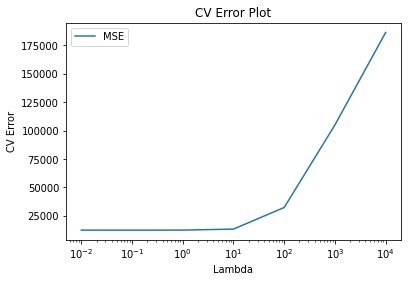

In [17]:
lambdas = [0.01, 0.1, 1, 10, 100, 1000, 10000]

x = np.array(lambdas)

fig, ax = plt.subplots()
plt.xscale('log')
ax.plot(x, CV, label="MSE")

ax.legend(loc = 'upper left')
plt.title("CV Error Plot") 
plt.xlabel("Lambda") 
plt.ylabel("CV Error") 
plt.show()

# ***Deliverable 3***
Based on the plot above, it can be dertermine that lambda = 0.1 provides the smallest error from all of the test lambdas

# ***Deliverable 4***

***Integrating all steps aforementioned above to retrain the ridge regression model with the full dataset and printing the beta results of the trained model.***

In [18]:
#retraining ridge regresion model with optimal lambda(tuning parameter)
X_train = data_in_array[:, 0:9]
y_train = data_in_array[:, -1]

X_train_std = []
X_train_mean = []
y_train_mean = []

for feature in range(X_train.shape[1]):
  
  X_train_mean.append(np.mean(X_train[:, feature]))
  X_train_std.append(np.std(X_train[:, feature]))

y_train_mean.append(np.mean(y_train))

y_train_centered = []
X_train_centered = []

y_train_centered = np.subtract(y_train, y_train_mean)

for feature in range(X_train.shape[1]):
  X_train_centered.append(np.subtract(X_train[:, feature], X_train_mean[feature])) 

X_train_centered = np.array(X_train_centered)
X_train_centered = np.transpose(X_train_centered)

X_train_normalized = []

for feature in range(X_train_centered.shape[1]):
  X_train_normalized.append(np.divide(X_train_centered[:, feature], X_train_std[feature]))

X_train_normalized = np.array(X_train_normalized)
X_train_normalized = np.transpose(X_train_normalized)

p = 9
beta = []
alpha = 10**-5
lambdas =  0.1

beta_temp = np.random.uniform(-1, 1 ,p)

for x in range(0, 10**5):
    
  beta_temp = beta_temp - 2 * alpha * (lamb * beta_temp - np.matmul(X.T, (y - np.matmul(X, beta_temp))))

beta = np.array(beta_temp)

print(beta.shape)
print(beta)

(9,)
[ 7.30675542 14.44169723 14.4740176   1.50156964 -0.12798262 -0.11412644
 -0.36379165  4.57395306 -0.13420054]
